In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
import statsmodels.api as sm

In [71]:
#load the dataset into a dataframe
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target

#We'll keep only five features:
#CRIM - per capita crime rate by town
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres 
df = df[['CRIM','NOX','RM','AGE','DIS']]

#We'll also add a constant term
df['constant'] = [1]*506

In [72]:
#a description of the variables and their stats
#read more here: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
df.describe()

CRIM         NOX          RM         AGE         DIS  constant
count  506.000000  506.000000  506.000000  506.000000  506.000000     506.0
mean     3.613524    0.554695    6.284634   68.574901    3.795043       1.0
std      8.601545    0.115878    0.702617   28.148861    2.105710       0.0
min      0.006320    0.385000    3.561000    2.900000    1.129600       1.0
25%      0.082045    0.449000    5.885500   45.025000    2.100175       1.0
50%      0.256510    0.538000    6.208500   77.500000    3.207450       1.0
75%      3.677083    0.624000    6.623500   94.075000    5.188425       1.0
max     88.976200    0.871000    8.780000  100.000000   12.126500       1.0

C:\Users\Elchanan\Anaconda3\envs\venv\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Elchanan\Anaconda3\envs\venv\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Elchanan\Anaconda3\envs\venv\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Elchanan\Anaconda3\envs\venv\lib\site-packages\pan

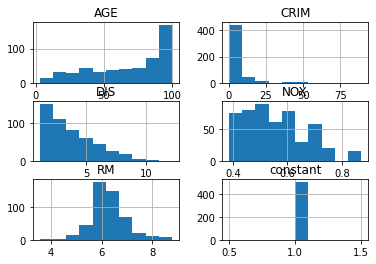

In [73]:
#Plot histograms of different variables
df.hist();

[Text(0, 0, 'CRIM'),
 Text(0, 1, 'NOX'),
 Text(0, 2, 'RM'),
 Text(0, 3, 'AGE'),
 Text(0, 4, 'DIS'),
 Text(0, 5, 'constant')]

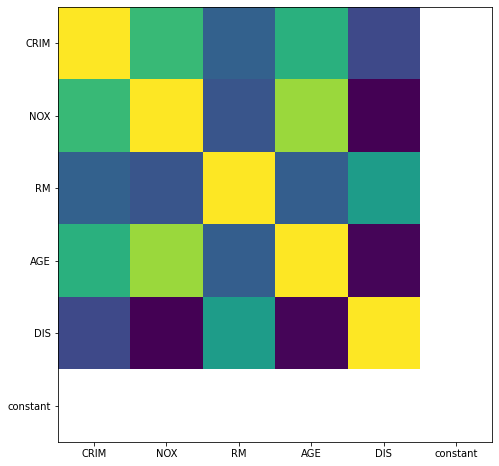

In [74]:
#Compute the correlations between variables
corrMatrix = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(8 ,8)
ax.imshow(corrMatrix)
features = df.columns
ax.set_xticks(np.arange(len(features)))
ax.set_yticks(np.arange(len(features)))
ax.set_xticklabels(features)
ax.set_yticklabels(features)
#ax.colorbar()

In [75]:
#Fit OLS linear model to crime data
res = sm.OLS(y,df[['CRIM','constant']]).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           1.17e-19
Time:                        13:22:47   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.4152      0.044     -9.460      0.0

In [76]:
#Fit a linear model to all the data. We'll add a constant feature to add an intercept.
res = sm.OLS(y,df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     145.3
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           5.02e-95
Time:                        13:22:47   Log-Likelihood:                -1613.2
No. Observations:                 506   AIC:                             3238.
Df Residuals:                     500   BIC:                             3264.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.2081      0.034     -6.113      0.0

In [77]:
#Make a data matrix containing the CRIM data, its square, and cubes, and a constant term
X = np.zeros((506,4))
X[:,0] = df['CRIM'].values
X[:,1] = X[:,0]**2
X[:,2] = X[:,0]**3
X[:,3] = np.ones(506)

In [78]:
#Fit degree 3 polynomial to CRIME data
res = sm.OLS(y,X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.57
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           1.45e-26
Time:                        13:22:47   Log-Likelihood:                -1778.1
No. Observations:                 506   AIC:                             3564.
Df Residuals:                     502   BIC:                             3581.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1364      0.144     -7.868      0.0

In [79]:
#Challenge 1: how do coeffs. and p-values for each feature, regressed separately, compare to the coeffs. and p-values
#in the multiple regression? Explain what you find.

In [80]:
#Challenge 2: Propose some interaction terms and add them to the model. Do you reject the null hypothesis, that the coeff.
#of interaction is 0?

In [81]:
#Challenge 3: We can compute the VIF of our non-constant features as follows. Do you propose deleting a variable? 
from statsmodels.stats.outliers_influence import variance_inflation_factor
data = df.to_numpy()
vif = [variance_inflation_factor(data, i) for i in range(data.shape[1])]
for i in range(5):
    print("VIF of " + df.columns[i] + ": " + str(vif[i]))

VIF of CRIM: 1.2432435537984512
VIF of NOX: 3.03367050144544
VIF of RM: 1.1193594482389018
VIF of AGE: 2.63496940813569
VIF of DIS: 3.020743360064873


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Xtrain,Xtest,ytrain,ytest = train_test_split(df,y,random_state =0)

reg = LinearRegression().fit(Xtest, ytest)
reg.score(Xtrain,ytrain)

0.5833669325155737

In [90]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(Xtrain,ytrain)
regressor.score(Xtest,ytest)

0.4684560892148367

In [91]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(Xtrain,ytrain)
rf.score(Xtest,ytest)

C:\Users\Elchanan\Anaconda3\envs\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5941222784823843